In [1]:
import pandas as pd
import csv
import os

# Laden der bereitgestellten CSV-Dateien
einkommen = '/workspaces/Abschlussprojekt_DSI/data/vie-bez-biz-ecn-inc-sex-2002f.csv'
geburten = '/workspaces/Abschlussprojekt_DSI/data/vie-bez-pop-sex-bir-2002f.csv'

# Korrektes Einlesen der CSV-Dateien mit Semikolon als Trennzeichen
data1 = pd.read_csv(einkommen, delimiter=';', skiprows=[0])
data2 = pd.read_csv(geburten, delimiter=';', skiprows=[0])

# Anzeigen der ersten paar Zeilen jeder Datei zur Überprüfung der korrekten Struktur
data1_head_formatted = data1.head()
data2_head_formatted = data2.head()

data1_head_formatted, data2_head_formatted



(   NUTS  DISTRICT_CODE  SUB_DISTRICT_CODE  REF_YEAR  REF_DATE  INC_TOT_VALUE  \
 0  AT13          90000              90000      2002  20021231         18.217   
 1  AT13          90100              90100      2002  20021231         25.463   
 2  AT13          90200              90200      2002  20021231         16.439   
 3  AT13          90300              90300      2002  20021231         18.701   
 4  AT13          90400              90400      2002  20021231         20.325   
 
    INC_MAL_VALUE  INC_FEM_VALUE  Unnamed: 8  Unnamed: 9  ...  Unnamed: 11  \
 0         20.709         15.424         NaN         NaN  ...          NaN   
 1         31.961         18.536         NaN         NaN  ...          NaN   
 2         18.301         14.282         NaN         NaN  ...          NaN   
 3         21.444         15.804         NaN         NaN  ...          NaN   
 4         23.641         16.876         NaN         NaN  ...          NaN   
 
    Unnamed: 12  Unnamed: 13  Unnamed: 14 

In [2]:
data1_head_formatted.shape, data2_head_formatted.shape

((5, 21), (5, 7))

In [3]:
data1_head_formatted.columns, data2_head_formatted.columns

(Index(['NUTS', 'DISTRICT_CODE', 'SUB_DISTRICT_CODE', 'REF_YEAR', 'REF_DATE',
        'INC_TOT_VALUE', 'INC_MAL_VALUE', 'INC_FEM_VALUE', 'Unnamed: 8',
        'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
        'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
        'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'],
       dtype='object'),
 Index(['NUTS', 'DISTRICT_CODE', 'SUB_DISTRICT_CODE', 'REF_YEAR', 'REF_DATE',
        'SEX', 'BIR'],
       dtype='object'))

In [4]:
data1_head_formatted.info(), data2_head_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUTS               5 non-null      object 
 1   DISTRICT_CODE      5 non-null      int64  
 2   SUB_DISTRICT_CODE  5 non-null      int64  
 3   REF_YEAR           5 non-null      int64  
 4   REF_DATE           5 non-null      int64  
 5   INC_TOT_VALUE      5 non-null      float64
 6   INC_MAL_VALUE      5 non-null      float64
 7   INC_FEM_VALUE      5 non-null      float64
 8   Unnamed: 8         0 non-null      float64
 9   Unnamed: 9         0 non-null      float64
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        0 non-null      float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        0 non-null      float64
 16  Unnamed: 16        0 non-null 

(None, None)

In [5]:
# Delimiter of file
def find_delimiter(filename):
    sniffer = csv.Sniffer()
    with open(filename) as fp:
        delimiter = sniffer.sniff(fp.read(5000)).delimiter
    return delimiter

find_delimiter('/workspaces/Abschlussprojekt_DSI/data/vie-bez-biz-ecn-inc-sex-2002f.csv')
find_delimiter('/workspaces/Abschlussprojekt_DSI/data/vie-bez-pop-sex-bir-2002f.csv')

';'

In [14]:
# Bereinigen der Daten: Entfernen unnötiger Spalten

# Bereinigen der Einkommensdaten
data1_clean = data1[['DISTRICT_CODE', 'REF_YEAR', 'INC_TOT_VALUE', 'INC_MAL_VALUE', 'INC_FEM_VALUE']]

# Bereinigen der Geburtsdaten
data2_clean = data2[['DISTRICT_CODE', 'REF_YEAR', 'BIR']]


# Anzeigen der bereinigten
data1_clean_head = data1_clean.head()
data2_clean_head = data2_clean.head()

data1_clean_head, data2_clean_head


(   DISTRICT_CODE  REF_YEAR  INC_TOT_VALUE  INC_MAL_VALUE  INC_FEM_VALUE
 0          90000      2002         18.217         20.709         15.424
 1          90100      2002         25.463         31.961         18.536
 2          90200      2002         16.439         18.301         14.282
 3          90300      2002         18.701         21.444         15.804
 4          90400      2002         20.325         23.641         16.876,
    DISTRICT_CODE  REF_YEAR  BIR
 0          90100      2002   58
 1          90100      2002   72
 2          90200      2002  490
 3          90200      2002  491
 4          90300      2002  370)

#### Durchschnittlicher Jahresnettobezug nach Geschlecht (in Euro pro ArbeitnehmerIn) seit 2002 (Data1):

* Enthält Spalten für Bezirkscode (DISTRICT_CODE), Jahr (REF_YEAR), durchschnittlichen Nettobezug insgesamt (INC_TOT_VALUE), für Männer (INC_MAL_VALUE) und Frauen (INC_FEM_VALUE).

#### Lebendgeburten in Wien seit 2002 (Data2):

* Enthält Spalten für Bezirkscode (DISTRICT_CODE), Jahr (REF_YEAR), Geschlecht des Kindes (SEX) und Anzahl der Geburten (BIR).
* Unnötige Zeilen wurden ebenfalls entfernt.

In [19]:
data2_grouped = data2_clean.groupby(['DISTRICT_CODE', 'REF_YEAR']).sum().reset_index()


data1_clean, data2_grouped

(     DISTRICT_CODE  REF_YEAR  INC_TOT_VALUE  INC_MAL_VALUE  INC_FEM_VALUE
 0            90000      2002         18.217         20.709         15.424
 1            90100      2002         25.463         31.961         18.536
 2            90200      2002         16.439         18.301         14.282
 3            90300      2002         18.701         21.444         15.804
 4            90400      2002         20.325         23.641         16.876
 ..             ...       ...            ...            ...            ...
 475          91900      2021         29.903         34.540         25.235
 476          92000      2021         21.201         22.241         19.916
 477          92100      2021         24.381         26.587         21.926
 478          92200      2021         26.722         29.850         23.454
 479          92300      2021         27.268         30.581         23.748
 
 [480 rows x 5 columns],
      DISTRICT_CODE  REF_YEAR   BIR
 0            90100      2002   130
 

In [20]:
# Verknüpfung der Datensätze
merged_data = pd.merge(data1_clean, data2_grouped, on=['DISTRICT_CODE', 'REF_YEAR'])

# Überprüfung der ersten paar Zeilen des verknüpften Datensatzes
merged_data

,DISTRICT_CODE,REF_YEAR,INC_TOT_VALUE,INC_MAL_VALUE,INC_FEM_VALUE,BIR
0,90100,2002,25.463,31.961,18.536,130
1,90200,2002,16.439,18.301,14.282,981
2,90300,2002,18.701,21.444,15.804,761
3,90400,2002,20.325,23.641,16.876,259
4,90500,2002,16.258,17.937,14.395,557
...,...,...,...,...,...,...
455,91900,2021,29.903,34.540,25.235,643
456,92000,2021,21.201,22.241,19.916,852
457,92100,2021,24.381,26.587,21.926,1878
458,92200,2021,26.722,29.850,23.454,1968


In [21]:
# category listing 

print(merged_data['DISTRICT_CODE'].unique())

[90100 90200 90300 90400 90500 90600 90700 90800 90900 91000 91100 91200
 91300 91400 91500 91600 91700 91800 91900 92000 92100 92200 92300]


In [22]:
merged_data.dtypes

DISTRICT_CODE      int64
REF_YEAR           int64
INC_TOT_VALUE    float64
INC_MAL_VALUE    float64
INC_FEM_VALUE    float64
BIR                int64
dtype: object

In [23]:
# Checking for special characters or unusual formatting in the first few rows
special_characters_check = merged_data.map(lambda x: not str(x).isascii()).sum()
special_characters_check

DISTRICT_CODE    0
REF_YEAR         0
INC_TOT_VALUE    0
INC_MAL_VALUE    0
INC_FEM_VALUE    0
BIR              0
dtype: int64

In [24]:
# Calculate the number of missing values in each column of the DataFrame and the percentage rate of these missing values

missing_values = merged_data.isnull().sum()
missing_values_percentage = (merged_data.isnull().mean() * 100)
missing_values

DISTRICT_CODE    0
REF_YEAR         0
INC_TOT_VALUE    0
INC_MAL_VALUE    0
INC_FEM_VALUE    0
BIR              0
dtype: int64

In [25]:
# Summary statistics

summary_stats = merged_data.describe()
summary_stats

,DISTRICT_CODE,REF_YEAR,INC_TOT_VALUE,INC_MAL_VALUE,INC_FEM_VALUE,BIR
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,91200.000000,2011.500000,21.955726,24.934389,18.870437,798.282609
std,664.047141,5.772559,3.994645,5.405394,2.901956,493.077772
min,90100.000000,2002.000000,14.998000,16.252000,13.415000,105.000000
25%,90600.000000,2006.750000,18.876000,20.677500,16.723750,409.250000
50%,91200.000000,2011.500000,21.618000,24.476500,18.633500,770.000000
75%,91800.000000,2016.250000,24.165750,27.708750,20.586250,1036.250000
max,92300.000000,2021.000000,37.250000,44.494000,29.954000,2552.000000


In [26]:
# Correlations between numerical fields

correlations = merged_data.corr(numeric_only=True)
correlations

,DISTRICT_CODE,REF_YEAR,INC_TOT_VALUE,INC_MAL_VALUE,INC_FEM_VALUE,BIR
DISTRICT_CODE,1.000000e+00,1.794010e-14,-0.173628,-0.165492,-0.172074,0.393730
REF_YEAR,1.794010e-14,1.000000e+00,0.491525,0.344684,0.721235,0.112570
INC_TOT_VALUE,-1.736282e-01,4.915250e-01,1.000000,0.984228,0.944541,-0.412314
INC_MAL_VALUE,-1.654924e-01,3.446839e-01,0.984228,1.000000,0.872229,-0.453349
INC_FEM_VALUE,-1.720736e-01,7.212347e-01,0.944541,0.872229,1.000000,-0.318180
BIR,3.937302e-01,1.125697e-01,-0.412314,-0.453349,-0.318180,1.000000


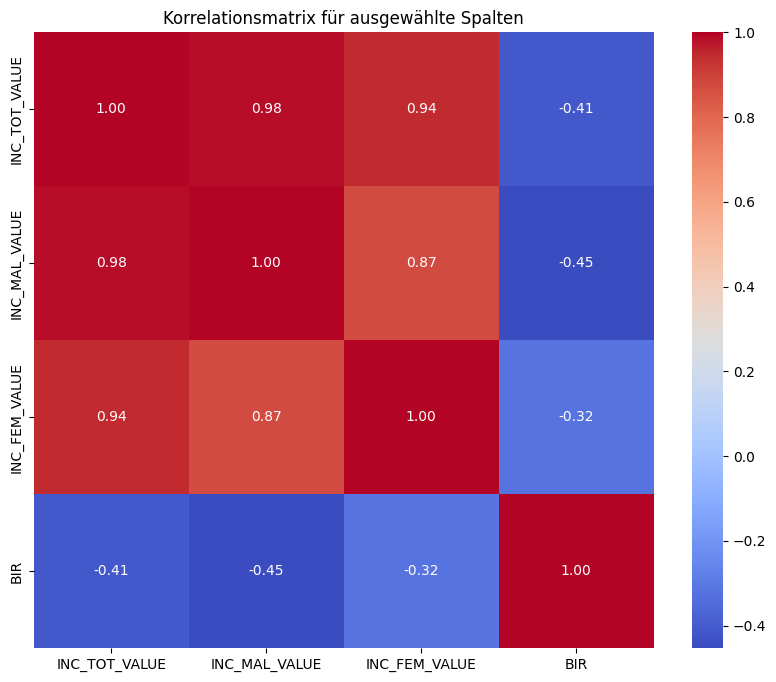

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Auswahl relevanter Spalten für die Korrelationsmatrix
columns_for_correlation = ['INC_TOT_VALUE', 'INC_MAL_VALUE', 'INC_FEM_VALUE', 'BIR']
correlation_data = merged_data[columns_for_correlation]

# Berechnung der Korrelationsmatrix
correlation_matrix = correlation_data.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix für ausgewählte Spalten')
plt.show()


#### Analyse
* Die Korrelationsmatrix, die wir erstellt haben, zeigt die Pearson-Korrelationskoeffizienten zwischen den Spalten **INC_TOT_VALUE** (durchschnittliches Gesamteinkommen), **INC_MAL_VALUE** (durchschnittliches Einkommen der Männer), **INC_FEM_VALUE** (durchschnittliches Einkommen der Frauen) und **BIR** (Anzahl der Geburten). Der Pearson-Korrelationskoeffizient ist ein Maß dafür, wie stark zwei Variablen miteinander in Beziehung stehen, und er reicht von -1 bis 1. Ein Wert nahe 1 zeigt eine starke positive Korrelation, ein Wert nahe -1 zeigt eine starke negative Korrelation, und ein Wert um 0 bedeutet, dass keine signifikante Korrelation besteht.

* Die spezifischen Werte der Matrix können interpretiert werden, um zu verstehen, wie die verschiedenen Einkommensarten und die Geburtenrate miteinander zusammenhängen. Beispielsweise könnte ein hoher positiver Korrelationswert zwischen dem durchschnittlichen Einkommen der Männer und der Anzahl der Geburten darauf hinweisen, dass in Bezirken mit höherem durchschnittlichem Männergehalt tendenziell mehr Geburten registriert werden.


In [29]:
# Save the DataFrame as a CSV file named 'clean_data.csv'.

clean_vie_data = 'clean_vie_data.csv'
merged_data.to_csv(clean_vie_data)